In [1]:
import sys
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    # montar el drive, que es donde tenemos el dataset
    from google.colab import drive
    drive.mount("/content/drive")
    data_dir = "/content/drive/MyDrive/Colab Notebooks/opencv/imagenes/"
    sys.path.append(data_dir)
else:
    import os
    data_dir = os.path.dirname('imagenes/') + "/"

In [2]:
import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (8, 5.0) # this controls figure size in the notebook


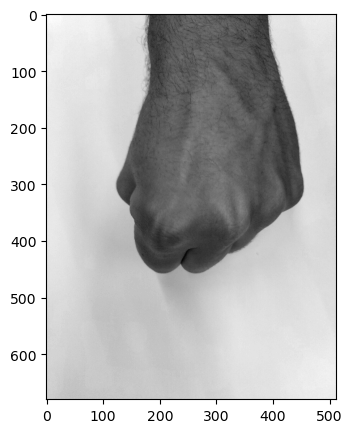

In [29]:
piedra = cv.imread(data_dir + "piedra.jpg")
piedra= cv.resize(piedra,(512,680))
img = piedra[:, :, 0]

ret,thpiedra = cv.threshold(img,255,255,255)
# thpiedra=th[:,:,2]
plt.imshow(thpiedra,cmap='gray')

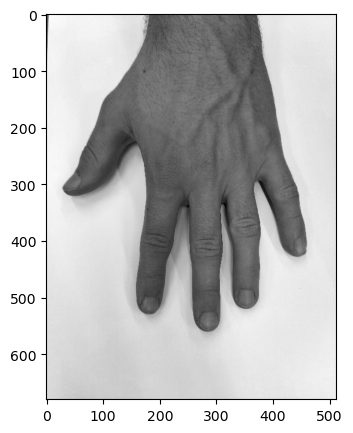

In [30]:
papel = cv.imread(data_dir + "papel.jpg")
papel= cv.resize(papel,(512,680))
img = papel[:, :, 0]
ret,thpapel = cv.threshold(img,255,255,255)
# thpiedra=th[:,:,2]
plt.imshow(thpapel,cmap='gray')

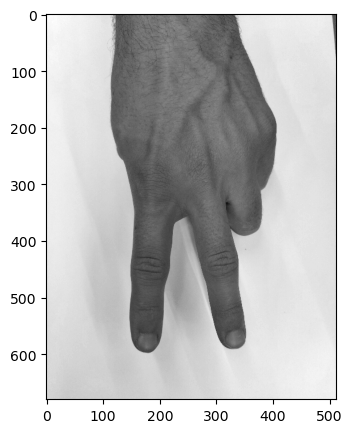

In [31]:
tijera = cv.imread(data_dir + "tijera.jpg")
tijera= cv.resize(tijera,(512,680))
img = tijera[:, :, 0]
ret,thtijera = cv.threshold(img,255,255,255)
# thpiedra=th[:,:,2]
plt.imshow(thtijera,cmap='gray')

Text(0.5, 1.0, 'Limpio')

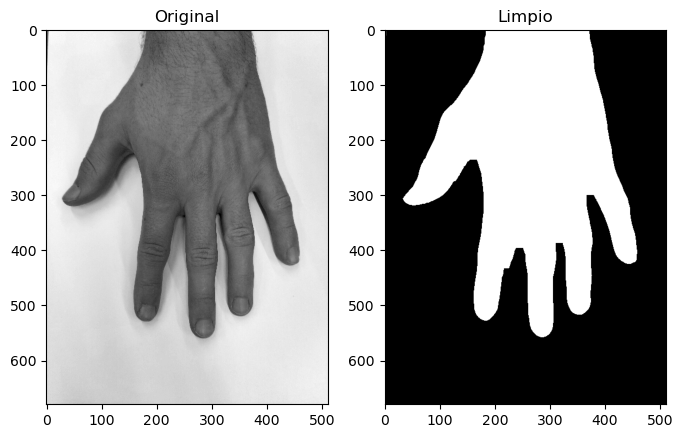

In [32]:
kernel = np.ones((5,5),np.uint8)
src_manos = cv.GaussianBlur(src=thpapel, ksize=(5,5), sigmaX=0, sigmaY=0)

ret1,src_monedas_binary = cv.threshold(src_manos,115,255,cv.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_binary, cv.MORPH_CLOSE, kernel, iterations=2)
src_monedas_clean = cv.morphologyEx(src_monedas_clean, cv.MORPH_OPEN, kernel, iterations=1)
erosionpapel = cv.erode(src_monedas_clean,kernel,iterations=1)
fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(thpapel,cmap="gray")
ax1.set_title("Original")
ax2.imshow(erosionpapel,cmap="gray")
ax2.set_title("Limpio")

Text(0.5, 1.0, 'Limpio')

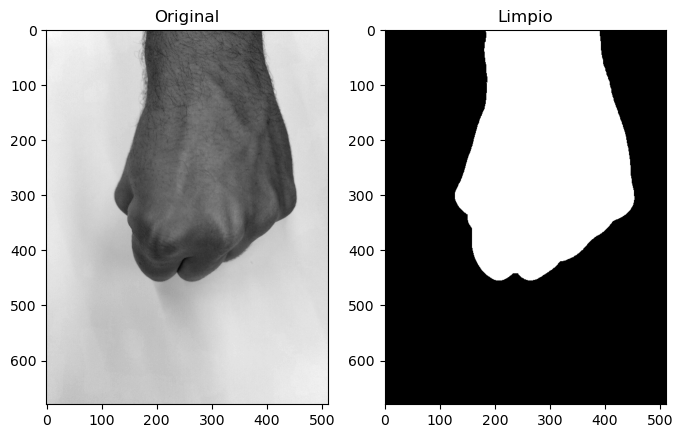

In [33]:
kernel = np.ones((5,5),np.uint8)
src_manos = cv.GaussianBlur(src=thpiedra, ksize=(5,5), sigmaX=0, sigmaY=0)

ret1,src_monedas_binary = cv.threshold(src_manos,115,255,cv.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_binary, cv.MORPH_CLOSE, kernel, iterations=1)
src_monedas_clean = cv.morphologyEx(src_monedas_clean, cv.MORPH_OPEN, kernel, iterations=1)
erosionpiedra = cv.erode(src_monedas_clean,kernel,iterations=1)
fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(thpiedra,cmap="gray")
ax1.set_title("Original")
ax2.imshow(erosionpiedra,cmap="gray")
ax2.set_title("Limpio")

Text(0.5, 1.0, 'Limpio')

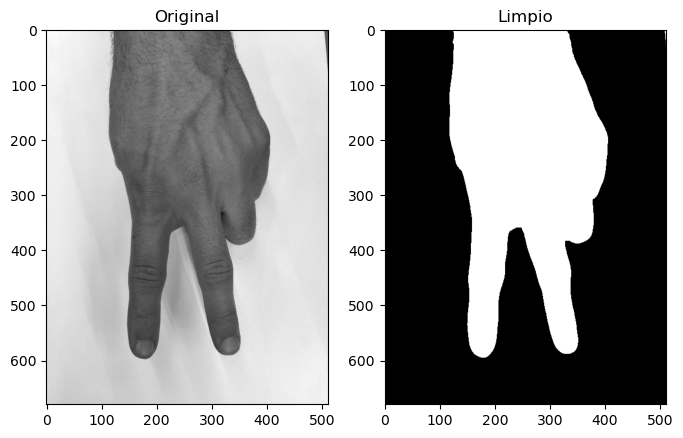

In [34]:
kernel = np.ones((5,5),np.uint8)
src_manos = cv.GaussianBlur(src=thtijera, ksize=(5,5), sigmaX=0, sigmaY=0)

ret1,src_monedas_binary = cv.threshold(src_manos,115,255,cv.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
src_monedas_clean = cv.morphologyEx(src_monedas_binary, cv.MORPH_CLOSE, kernel, iterations=1)
src_monedas_clean = cv.morphologyEx(src_monedas_clean, cv.MORPH_OPEN, kernel, iterations=1)
erosiontijera = cv.erode(src_monedas_clean,kernel,iterations=1)
fig,(ax1,ax2) = plt.subplots(1,2)

ax1.imshow(thtijera,cmap="gray")
ax1.set_title("Original")
ax2.imshow(erosiontijera,cmap="gray")
ax2.set_title("Limpio")

Text(0.5, 1.0, 'Limpio')

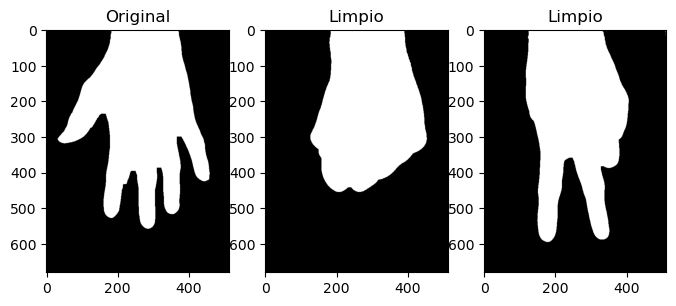

In [35]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(erosionpapel,cmap="gray")
ax1.set_title("Original")
ax2.imshow(erosionpiedra,cmap="gray")
ax2.set_title("Limpio")
ax3.imshow(erosiontijera,cmap="gray")
ax3.set_title("Limpio")

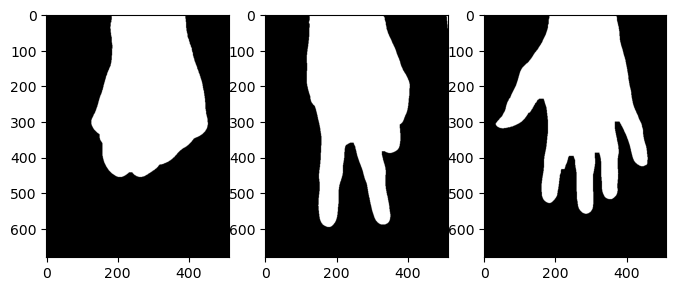

In [36]:
umbral_minimo = 50
umbral_maximo = 100
cnpiedra = cv.Canny(erosionpiedra, umbral_minimo, umbral_maximo)
cntijera = cv.Canny(erosiontijera, umbral_minimo, umbral_maximo)
cnpapel = cv.Canny(erosionpapel, umbral_minimo, umbral_maximo)

cnpiedra = erosionpiedra; cnpapel = erosionpapel; cntijera = erosiontijera


fig,(ax1,ax2,ax3) = plt.subplots(1,3)

ax1.imshow(cnpiedra,cmap="gray")
ax2.imshow(cntijera,cmap="gray")
ax3.imshow(cnpapel,cmap="gray")

1
Centro: 288, 224
Área: 109711.0  Perímetro: 1394.6315925121307
HÁrea: 116258.5  HPerímetro: 1310.9315149784088
A/H: 0.943681537263942  P/HP: 1.0638477880632082 AREAPER/HAREAPER:0.887045635524575


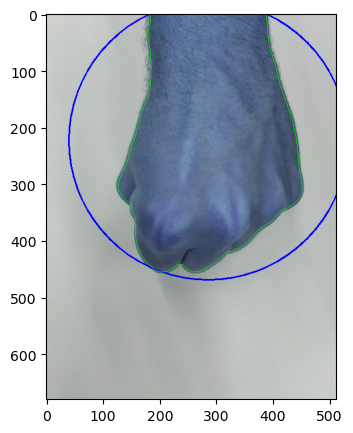

In [55]:

contornos, jerarquia = cv.findContours(cnpiedra.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))
for cnt in range(len(contornos)):
  cnt = contornos[cnt]
  M = cv.moments(cnt)
  if M['m00'] != 0:
    cx = int(M["m10"]/M['m00'])
    cy = int(M["m01"]/M['m00'])
    print(f"Centro: {cx}, {cy}")
  area = cv.contourArea(cnt)
  perimetro = cv.arcLength(cnt, True)
  if area < 10000 or perimetro < 300: continue
  (x,y),radius = cv.minEnclosingCircle(cnt)
  hull = cv.convexHull(cnt)
  harea = cv.contourArea(hull)
  hperimetro=cv.arcLength(hull, True)
  r_ap=area/perimetro
  hr_ap=harea/hperimetro
  rel_a_ha=area/harea
  rel_p_hp=perimetro/hperimetro 

  print(f"Área: {area}  Perímetro: {perimetro}")
  print(f"HÁrea: {harea}  HPerímetro: {hperimetro}")
  print(f"A/H: {rel_a_ha}  P/HP: {rel_p_hp} AREAPER/HAREAPER:{r_ap/hr_ap}")
  info_piedra=f"PIEDRA:Área: {area}  Perímetro: {perimetro} HÁrea: {harea}  HPerímetro: {hperimetro} A/H: {rel_a_ha}  P/HP: {rel_p_hp} AREAPER/HAREAPER:{r_ap/hr_ap}"
  approx = cnt
  (x,y),radius = cv.minEnclosingCircle(cnt)
  cv.circle(piedra, (int(x), int(y)), int(radius), (0,0,255), 2)
  cv.drawContours(piedra, [approx], -1, (0,255,0), 1)
plt.imshow(piedra)


2
Centro: 509, 11
Centro: 252, 247
Área: 115819.0  Perímetro: 2098.087435603142
HÁrea: 144343.5  HPerímetro: 1586.9043573141098
A/H: 0.8023845895381503  P/HP: 1.3221259529176836 AREAPER/HAREAPER:0.6068896747450108


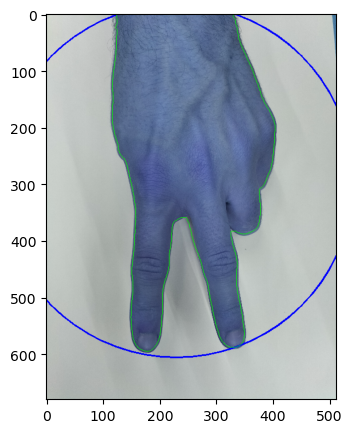

In [56]:

1
contornos, jerarquia = cv.findContours(cntijera.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))
for cnt in range(len(contornos)):
  cnt = contornos[cnt]
  M = cv.moments(cnt)
  if M['m00'] != 0:
    cx = int(M["m10"]/M['m00'])
    cy = int(M["m01"]/M['m00'])
    print(f"Centro: {cx}, {cy}")
  area = cv.contourArea(cnt)
  perimetro = cv.arcLength(cnt, True)
  if area < 10000 or perimetro < 300: continue
  (x,y),radius = cv.minEnclosingCircle(cnt)
  hull = cv.convexHull(cnt)
  harea = cv.contourArea(hull)
  hperimetro=cv.arcLength(hull, True)
  r_ap=area/perimetro
  hr_ap=harea/hperimetro
  rel_a_ha=area/harea
  rel_p_hp=perimetro/hperimetro 

  print(f"Área: {area}  Perímetro: {perimetro}")
  print(f"HÁrea: {harea}  HPerímetro: {hperimetro}")
  print(f"A/H: {rel_a_ha}  P/HP: {rel_p_hp} AREAPER/HAREAPER:{r_ap/hr_ap}")
  info_tijera=f"TIJERA:Área: {area}  Perímetro: {perimetro} HÁrea: {harea}  HPerímetro: {hperimetro} A/H: {rel_a_ha}  P/HP: {rel_p_hp} AREAPER/HAREAPER:{r_ap/hr_ap}"
  approx = cnt
  (x,y),radius = cv.minEnclosingCircle(cnt)
  cv.circle(tijera, (int(x), int(y)), int(radius), (0,0,255), 2)
  cv.drawContours(tijera, [approx], -1, (0,255,0), 1)
plt.imshow(tijera)


2
Centro: 267, 246
Área: 125225.0  Perímetro: 2641.2732883691788
HÁrea: 166036.5  HPerímetro: 1557.2901964187622
A/H: 0.75420163638718  P/HP: 1.696070067379355 AREAPER/HAREAPER:0.4446759900388537
Centro: 0, 5


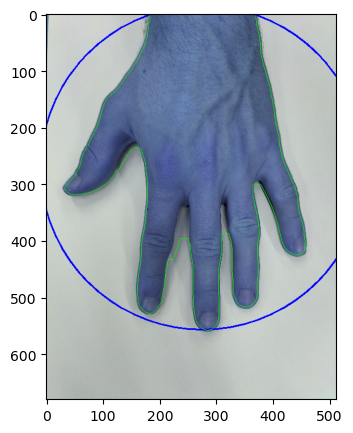

In [57]:
1
contornos, jerarquia = cv.findContours(cnpapel.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))
for cnt in range(len(contornos)):
  cnt = contornos[cnt]
  M = cv.moments(cnt)
  if M['m00'] != 0:
    cx = int(M["m10"]/M['m00'])
    cy = int(M["m01"]/M['m00'])
    print(f"Centro: {cx}, {cy}")
  area = cv.contourArea(cnt)
  perimetro = cv.arcLength(cnt, True)
  if area < 10000 or perimetro < 300: continue
  (x,y),radius = cv.minEnclosingCircle(cnt)
  hull = cv.convexHull(cnt)
  harea = cv.contourArea(hull)
  hperimetro=cv.arcLength(hull, True)
  r_ap=area/perimetro
  hr_ap=harea/hperimetro
  rel_a_ha=area/harea
  rel_p_hp=perimetro/hperimetro 

  print(f"Área: {area}  Perímetro: {perimetro}")
  print(f"HÁrea: {harea}  HPerímetro: {hperimetro}")
  print(f"A/H: {rel_a_ha}  P/HP: {rel_p_hp} AREAPER/HAREAPER:{r_ap/hr_ap}")
  info_papel=f"PAPEL:Área: {area}  Perímetro: {perimetro} HÁrea: {harea}  HPerímetro: {hperimetro} A/H: {rel_a_ha}  P/HP: {rel_p_hp} AREAPER/HAREAPER:{r_ap/hr_ap}"
  approx = cnt
  (x,y),radius = cv.minEnclosingCircle(cnt)
  cv.circle(papel, (int(x), int(y)), int(radius), (0,0,255), 2)
  cv.drawContours(papel, [approx], -1, (0,255,0), 1)
plt.imshow(papel)

In [58]:
print(info_papel)
print(info_piedra)
print(info_tijera)
#PODEMOS DETERMINAR LA DIFERENCIA ENTRE LA PIEDRA Y EL PAPEL POR EL PERÍMETRO(P/HP)
#PODEMOS DETERMINAR LA DIFERENCIA ENTRE LA PIEDRA Y LA TIJERA POR 


PAPEL:Área: 125225.0  Perímetro: 2641.2732883691788 HÁrea: 166036.5  HPerímetro: 1557.2901964187622 A/H: 0.75420163638718  P/HP: 1.696070067379355 AREAPER/HAREAPER:0.4446759900388537
PIEDRA:Área: 109711.0  Perímetro: 1394.6315925121307 HÁrea: 116258.5  HPerímetro: 1310.9315149784088 A/H: 0.943681537263942  P/HP: 1.0638477880632082 AREAPER/HAREAPER:0.887045635524575
TIJERA:Área: 115819.0  Perímetro: 2098.087435603142 HÁrea: 144343.5  HPerímetro: 1586.9043573141098 A/H: 0.8023845895381503  P/HP: 1.3221259529176836 AREAPER/HAREAPER:0.6068896747450108


In [61]:
# video = cv.VideoCapture(0)

# while(True):
#     ret, frame = video.read()
#     if ret == True:
#         frame = cv.flip(frame, 1)
#         cv.imshow("Salida", frame)
#         frame2=cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
#         cv.namedWindow("Frame")
#         cv.imshow("Frame", frame)
#         if cv.waitKey(10) & 0xFF == 27: break

# video.release()
# cv.destroyAllWindows()

KeyboardInterrupt: 